# Pacotes

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.stats.weightstats import zconfint, DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, normaltest, ranksums

# Leitura de Dados

In [2]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv')
tmdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


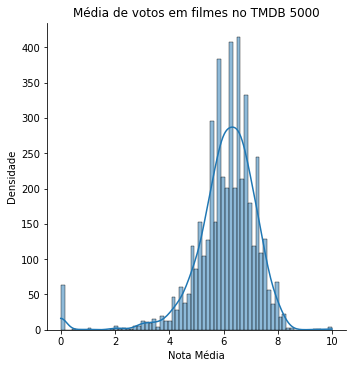

In [4]:
ax = sns.displot(tmdb['vote_average'], kde=True)
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set(title = "Média de votos em filmes no TMDB 5000")

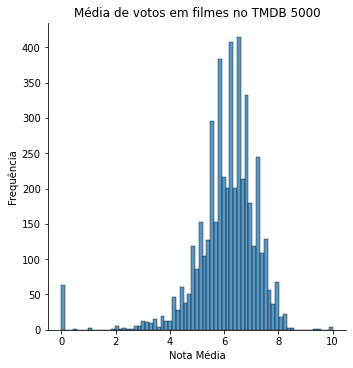

In [5]:
ax = sns.displot(tmdb['vote_average'], kind="hist")
ax.set(xlabel = 'Nota Média', ylabel = 'Frequência')
ax.set(title = "Média de votos em filmes no TMDB 5000")

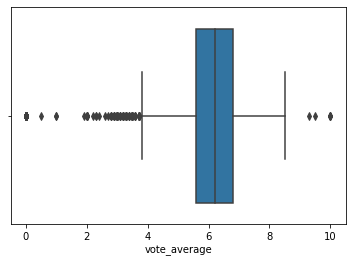

In [6]:
ax = sns.boxplot(x = tmdb['vote_average'])


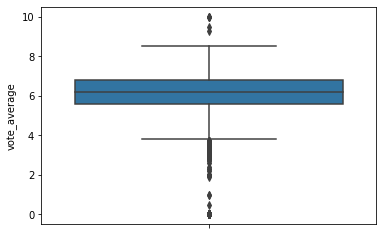

In [7]:
ax = sns.boxplot(y = tmdb['vote_average'])

Text(0.5, 1.0, 'Dsitribuição de nota média dos filmes no TMDB 5000')

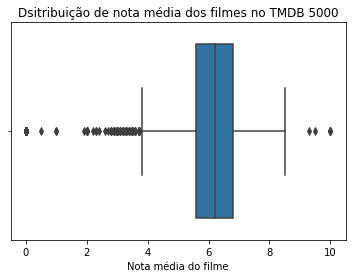

In [8]:
ax = sns.boxplot(x = tmdb['vote_average'])
ax.set(xlabel="Nota média do filme")
ax.set_title("Dsitribuição de nota média dos filmes no TMDB 5000")

Tem algo de estranho com os meus dados... não tem sentido as minhas notas cuja a nota média é 0 ou 10, vmaos ver!!!

In [9]:
tmdb.query("vote_average == 0 ").head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0


In [10]:
tmdb.query("vote_average == 10 ").head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1


Detectamos que os filmes tem pouco votos, não participaram por não terem relevância no dataset.

In [11]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10 ")
tmdb_com_mais_de_10_votos.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [12]:
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


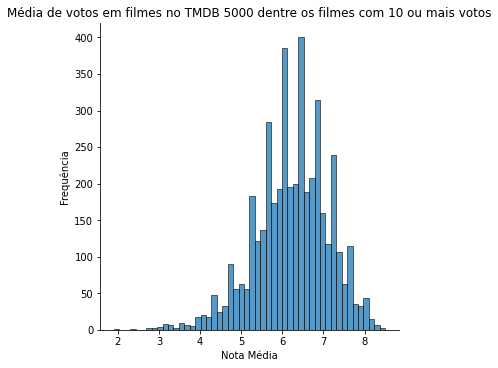

In [13]:
ax = sns.displot(tmdb_com_mais_de_10_votos['vote_average'], kind="hist")
ax.set(xlabel = 'Nota Média', ylabel = 'Frequência')
ax.set(title = "Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

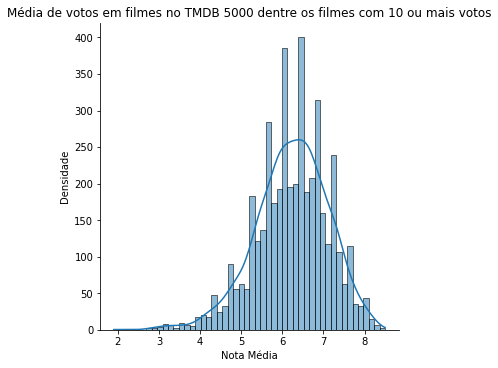

In [14]:
ax = sns.displot(tmdb_com_mais_de_10_votos['vote_average'], kde=True)
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set(title = "Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

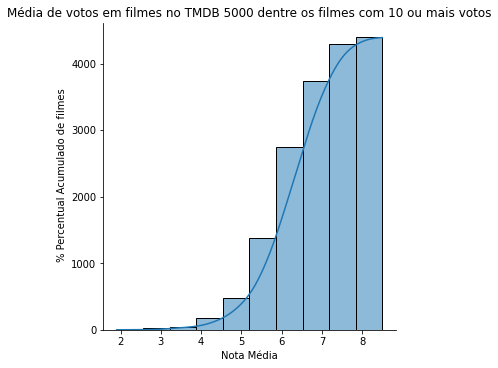

In [15]:
ax = sns.displot(tmdb_com_mais_de_10_votos['vote_average'], 
                  kde = True,
                  cumulative=True,
                  bins = 10)
ax.set(xlabel = 'Nota Média', ylabel = ' % Percentual Acumulado de filmes')
ax.set(title = "Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

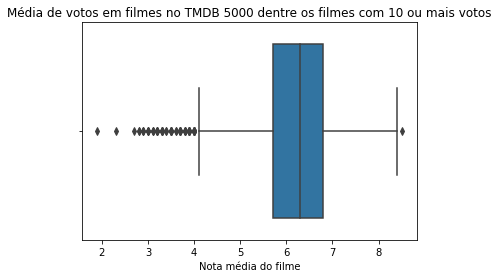

In [16]:
ax = sns.boxplot(x = tmdb_com_mais_de_10_votos['vote_average'])
ax.set(xlabel="Nota média do filme")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

# Analisaremos também o movielens

In [17]:
notas = pd.read_csv('data/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
nota_media_por_filme = notas.groupby("movieId").mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

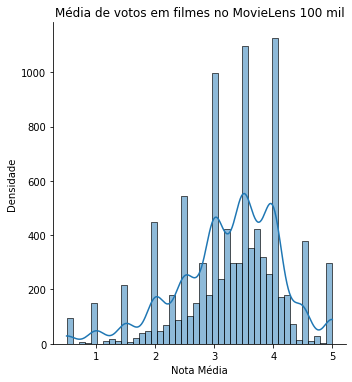

In [19]:
ax = sns.displot(nota_media_por_filme.values, kde=True)
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set(title = "Média de votos em filmes no MovieLens 100 mil")

In [20]:
quantidade_de_votos_por_filmes = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filmes.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593], dtype=int64)

In [21]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

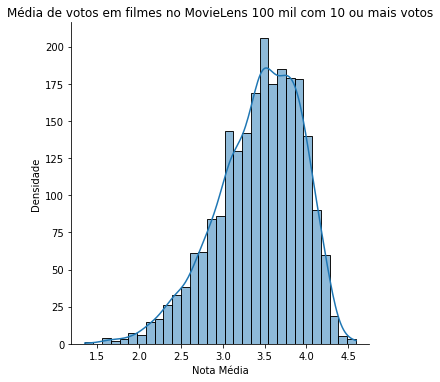

In [22]:
ax = sns.displot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, kde=True)
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set(title = "Média de votos em filmes no MovieLens 100 mil com 10 ou mais votos")

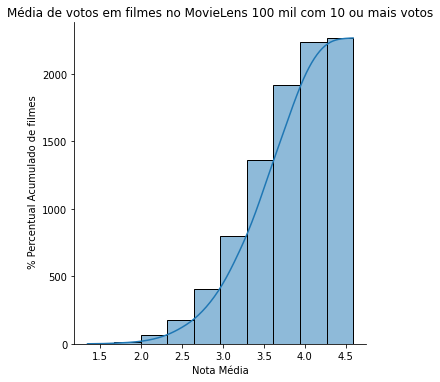

In [23]:
ax = sns.displot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, 
                  kde = True,
                  cumulative=True,
                  bins = 10)
ax.set(xlabel = 'Nota Média', ylabel = ' % Percentual Acumulado de filmes')
ax.set(title = "Média de votos em filmes no MovieLens 100 mil com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no MovieLens 100 mil com 10 ou mais votos')

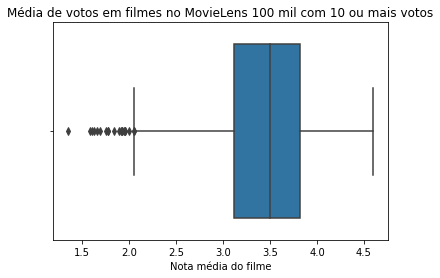

In [24]:
ax = sns.boxplot(x = nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média do filme")
ax.set_title("Média de votos em filmes no MovieLens 100 mil com 10 ou mais votos")

# Analisando a distribuição dos dados capturados de outros campos do TMDB.

In [25]:
numero_de_votos = tmdb_com_mais_de_10_votos['vote_count']

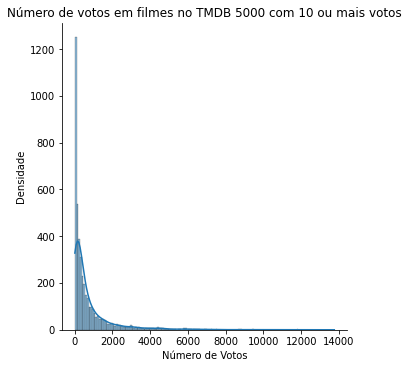

In [26]:
ax = sns.displot(numero_de_votos, kde=True)
ax.set(xlabel = 'Número de Votos', ylabel = 'Densidade')
ax.set(title = "Número de votos em filmes no TMDB 5000 com 10 ou mais votos")

In [27]:
tmdb_budget_por_filme = tmdb.query("budget > 0 ")['budget']

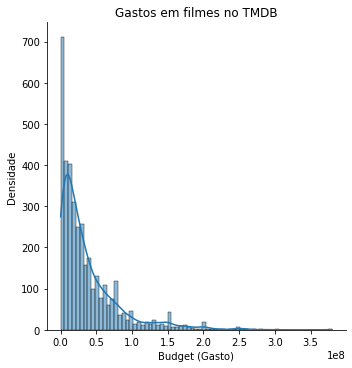

In [28]:
ax = sns.displot(tmdb_budget_por_filme, kde=True)
ax.set(xlabel = 'Budget (Gasto)', ylabel = 'Densidade')
ax.set(title = "Gastos em filmes no TMDB")

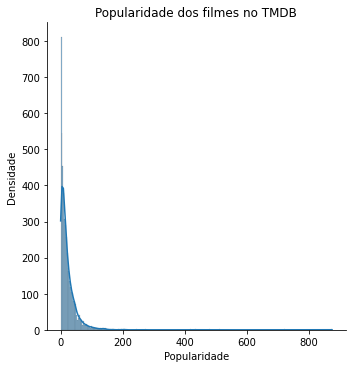

In [29]:
tmdb_popularidade_por_filme = tmdb['popularity']
ax = sns.displot(tmdb_popularidade_por_filme, kde=True)
ax.set(xlabel = 'Popularidade', ylabel = 'Densidade')
ax.set(title = "Popularidade dos filmes no TMDB")

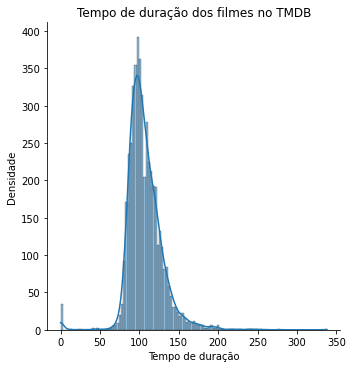

In [30]:
tmdb_runtime_por_filme = tmdb['runtime']
ax = sns.displot(tmdb_runtime_por_filme, kde=True)
ax.set(xlabel = 'Tempo de duração', ylabel = 'Densidade')
ax.set(title = "Tempo de duração dos filmes no TMDB")

In [31]:
tmdb_runtime_por_filme.isnull().sum()

2

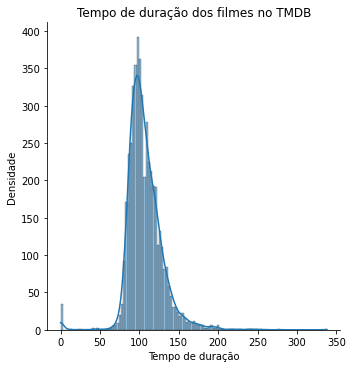

In [32]:
tmdb_runtime_por_filme = tmdb_runtime_por_filme.dropna()
ax = sns.displot(tmdb_runtime_por_filme, kde=True)
ax.set(xlabel = 'Tempo de duração', ylabel = 'Densidade')
ax.set(title = "Tempo de duração dos filmes no TMDB")


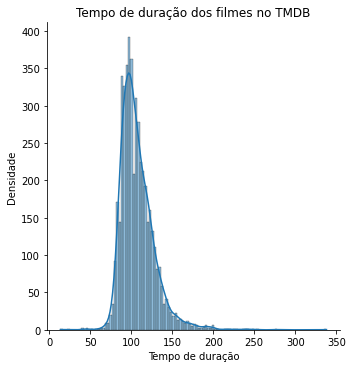

In [33]:
tmdb_runtime_por_filme = tmdb.query("runtime > 0")['runtime'].dropna()
ax = sns.displot(tmdb_runtime_por_filme, kde=True)
ax.set(xlabel = 'Tempo de duração', ylabel = 'Densidade')
ax.set(title = "Tempo de duração dos filmes no TMDB")

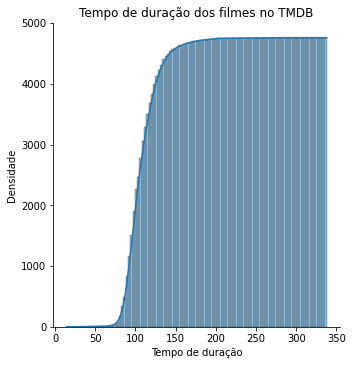

In [34]:
tmdb_runtime_por_filme = tmdb.query("runtime > 0")['runtime'].dropna()
ax = sns.displot(tmdb_runtime_por_filme, kde = True,  cumulative = True)
ax.set(xlabel = 'Tempo de duração', ylabel = 'Densidade')
ax.set(title = "Tempo de duração dos filmes no TMDB")

In [35]:
tmdb_runtime_por_filme.quantile(0.80)

121.0

In [36]:
tmdb_runtime = pd.DataFrame(tmdb_runtime_por_filme)
tmdb_runtime['quantidades'] = tmdb_runtime.count(axis=1)
tmdb_runtime


,runtime,quantidades
0,162.0,1
1,169.0,1
2,148.0,1
3,165.0,1
4,132.0,1
...,...,...
4798,81.0,1
4799,85.0,1
4800,120.0,1
4801,98.0,1


In [37]:
tmdb_runtime = tmdb_runtime.groupby('runtime', as_index=False)['quantidades'].sum()
tmdb_runtime.query("quantidades > 200")


,runtime,quantidades


In [38]:
quantidades = tmdb_runtime['quantidades'].sum(axis=0)
quantidades

4766

In [39]:
tmdb_runtime['percentuais'] = tmdb_runtime['quantidades'] / quantidades
tmdb_runtime['percentuais'].sum()

0.9999999999999999

# MovieLens Média dos filmes com pelo menos 10 votos

In [40]:
print(f"Média dos filmes com pelo menos 10 votos: {nota_media_dos_filmes_com_pelo_menos_10_votos.mean()}")

Média dos filmes com pelo menos 10 votos: 3.4320503405352603


In [41]:
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

In [42]:
nota_media_dos_filmes_com_pelo_menos_10_votos[0:5].mean()

3.5259741603585653

In [43]:
len(nota_media_dos_filmes_com_pelo_menos_10_votos)

2269

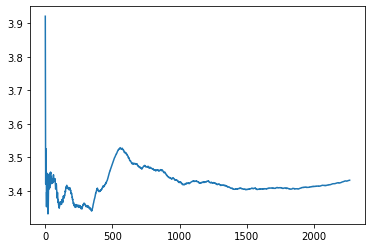

In [44]:
# Amostras - sampling

medias = list()
temp = nota_media_dos_filmes_com_pelo_menos_10_votos
for i in range(1,len(temp)):
    medias.append(temp[0:i].mean())
plt.plot(medias)

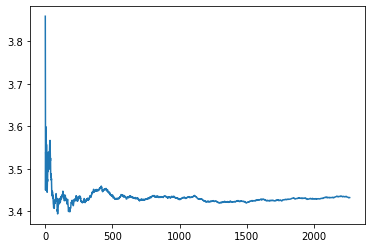

In [45]:
# Amostras - sampling

medias = list()
np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)
for i in range(1,len(temp)):
    medias.append(temp[0:i].mean())
plt.plot(medias)

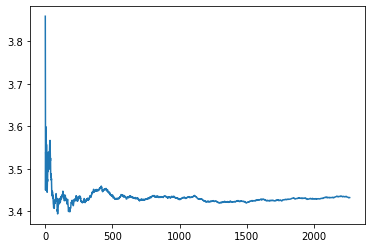

In [46]:
# Amostras - sampling

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)
medias = [ temp[0:i].mean() for i in range(1,len(temp)) ] 
plt.plot(medias)

##  Intervalo de Confiança

In [47]:
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [48]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229379, 3.4528658418411378)

# Vamos ver o filme 1 

In [49]:
filmes = pd.read_csv("data/movies.csv")
filmes.query("movieId == 1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [50]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


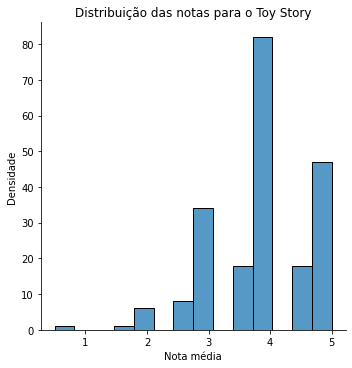

In [51]:
ax = sns.displot(notas1['rating'])
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set(title = "Distribuição das notas para o Toy Story")

C:\Users\alexsandro.ignacio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')]

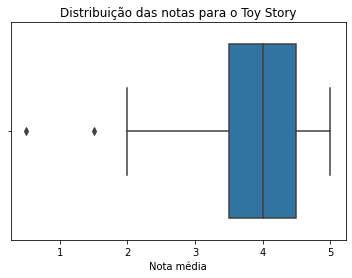

In [52]:
ax = sns.boxplot(notas1['rating'])
ax.set(xlabel = "Nota média")
ax.set(title = "Distribuição das notas para o Toy Story")

In [53]:
notas1['rating'].mean()

3.9209302325581397

In [54]:
notas1['rating'].median()

4.0

In [55]:
notas1['rating'].count()

215

In [56]:
notas1['rating'].describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [57]:
# intervalo de confiança.
zconfint(notas1['rating'])

(3.8093359183563402, 4.032524546759939)

In [58]:
tstat, pvalue = ztest(notas1['rating'], value = 3.4320503405352603)
print(f" T Stat: {tstat} P Valor: {pvalue}")

 T Stat: 8.586342305916716 P Valor: 8.978190401886942e-18


In [59]:
pvalue <= 0.05

True

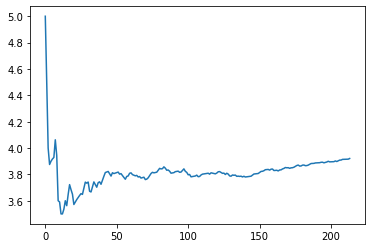

In [60]:
# Amostras - sampling

np.random.seed(75241)
temp = notas1.sample(frac=1)['rating']
medias = [ temp[0:i].mean() for i in range(1,len(temp)) ] 
plt.plot(medias)

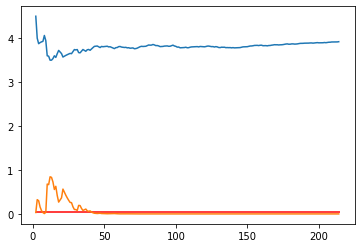

In [61]:
# Amostras - sampling

np.random.seed(75241)
temp = notas1.sample(frac=1)['rating']

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, pvalue = ztest( temp[0:i], value = 3.4320503405352603 )
    return (i, media, pvalue)

valores = np.array( [ calcula_teste(i)for i in range(2,len(temp)) ] )

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax= len(temp), colors='r')

# Comparação de dois conjuntos de amostras

In [62]:
# Vai utilizar a média das duas distribuições para gerar um intervalo de confiança.
print('p valor: ', ztest(notas1['rating'], notas['rating']))
print('intervalo de confiança: ', zconfint(notas1['rating'], notas['rating']))

p valor:  (5.894327101501841, 3.762112778881965e-09)
intervalo de confiança:  (0.2799245129192442, 0.5588219849631111)


In [63]:
# Vai utilizar a média das duas distribuições para gerar um intervalo de confiança.
print(f"Cuidado ao inverter as amostras, pois vai trazer comparações erradas")
print('p valor: ', ztest(notas['rating'], notas1['rating']))
print('intervalo de confiança: ', zconfint(notas['rating'], notas1['rating']))

Cuidado ao inverter as amostras, pois vai trazer comparações erradas
p valor:  (-5.894327101501841, 3.762112778881965e-09)
intervalo de confiança:  (-0.5588219849631111, -0.2799245129192442)


In [64]:
# Realizando o T test com scipy
ttest_ind(notas1['rating'], notas['rating'])


Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [65]:
# Realizando o T test com Statemodels
descr_todas_as_notas = DescrStatsW(notas['rating'])
descr_toystory = DescrStatsW(notas1['rating'])
comparacao = descr_todas_as_notas.get_compare(descr_toystory)

In [66]:
import statsmodels as sm 
sm.__version__

'0.13.0'

In [67]:
# Instalando ersão atualizada:
# !pip install statmodels=='0.9.0'

In [68]:
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [69]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


No próximo vídeo, minuto 12:56, é afirmado que para se usar o t-test no CompareMeans.summary era necessário passar o True para o parâmetro use_t, isso está correto. Entretando por padrão o use_t já é True, e para usar o z-test você precisa configurar o use_t igual a False.

Segue um exemplo de como usar o t-test e z-test no código que será dado na aula:

t-test:

comparacao.summary(use_t=True)

Ou

comparacao.summary()

z-test:

comparacao.summary(use_t = False)

# Comparando graficamente

Text(0.5, 1.0, 'Distribuiçao das notas de acordo com filmes')

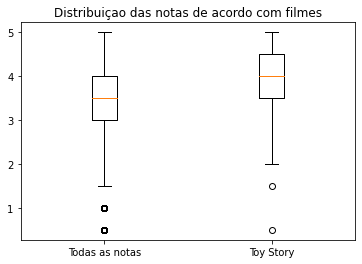

In [70]:
plt.boxplot([ notas['rating'], notas1['rating'] ], labels=["Todas as notas", "Toy Story"])
plt.title("Distribuiçao das notas de acordo com filmes")

Text(0.5, 1.0, 'Distribuiçao das notas de acordo com filmes')

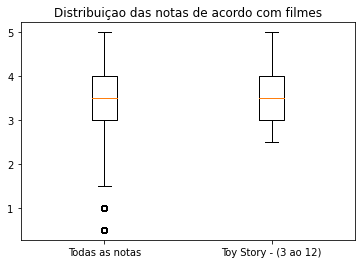

In [71]:
plt.boxplot([ notas['rating'], notas1[3:12]['rating'] ], labels=["Todas as notas", "Toy Story - (3 ao 12)"])
plt.title("Distribuiçao das notas de acordo com filmes")

In [72]:
# Realizando o T test com Statemodels
descr_todas_as_notas = DescrStatsW(notas['rating'])
descr_toystory = DescrStatsW(notas1[3:12]['rating'])
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


Marcelo gostaria de fazer uma análise da distribuição de suas médias do colegial, de modo a apresentar a mediana, quartis e outliers em um única visualização. Como ele pode gerar essas informações utilizando o pandas?

Ele deverá utilizar a biblioteca matplotlib.pyplot& para gerar um gráfico plt.boxplot(), passando as suas notas de colegial como parâmetro.


Com plt.boxplot(), Marcelo conseguirá gerar um gráfico de distribuição que lhe permitirá analisar a frequência das suas notas ao longo de sua passagem pelo colegial!

Um exemplo de código seria:

In [73]:
marcelo = pd.Series([5,8,10,1,7.5,8.9])
ana = pd.Series([5,9,9,8,8.5,8.9])
joao = pd.Series([10,10,9,4,8.5,9.99])
notas_alunos = pd.DataFrame({'marcelo':marcelo, 'joão':joao, 'ana':ana})
notas_alunos

,marcelo,joão,ana
0,5.0,10.00,5.0
1,8.0,10.00,9.0
2,10.0,9.00,9.0
3,1.0,4.00,8.0
4,7.5,8.50,8.5
5,8.9,9.99,8.9


Text(0.5, 1.0, 'Distribuição das notas do Marcelo ao longo do colegial')

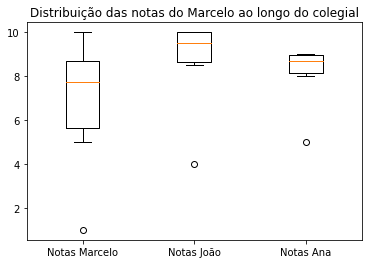

In [75]:

plt.boxplot([notas_alunos['marcelo'], notas_alunos['joão'], notas_alunos['ana']  ], labels=["Notas Marcelo", "Notas João", "Notas Ana"])
plt.title("Distribuição das notas do Marcelo ao longo do colegial")

# Comparar a média de dois filmes

In [107]:
titles = filmes.query('movieId in [1, 593, 72226]')
titles = titles['title'].str.split(' ').reset_index(drop=True)
titles = [titles[0][0] + ' ' + titles[0][1], titles[1][0]  + ' ' + titles[1][1] + ' ' + titles[1][2] + ' ' + titles[1][3], titles[2][0] + ' ' + titles[2][1] + ' ' + titles[2][2] ]
titles[1] = titles[1].replace(',','')
titles


['Toy Story', 'Silence of the Lambs', 'Fantastic Mr. Fox']

In [108]:
notas1 = notas.query("movieId  == 1")
notas593 = notas.query("movieId  == 593")
notas72226= notas.query("movieId  == 72226")

Text(0.5, 1.0, 'Distribuiçao das notas de acordo com filmes')

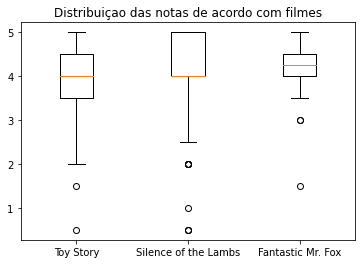

In [109]:
plt.boxplot([ notas1['rating'], notas593['rating'], notas72226['rating'] ], labels=titles)
plt.title("Distribuiçao das notas de acordo com filmes")

In [110]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


<AxesSubplot:>

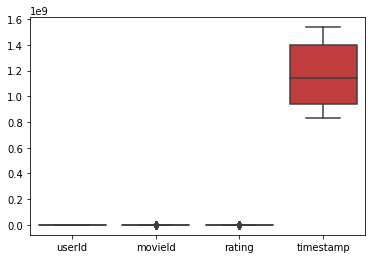

In [111]:
sns.boxplot(data = notas.query("movieId in (1 , 593, 72226)"))

In [126]:
notas[ notas['movieId'].isin((1, 593, 72226)) ].shape

(512, 4)

In [127]:
notas.loc[ notas['movieId'].isin((1, 593, 72226)) ].shape

(512, 4)

<AxesSubplot:>

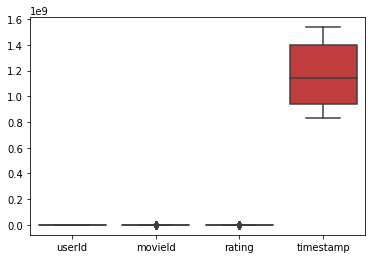

In [119]:
sns.boxplot(data = notas[ notas['movieId'].isin((1, 593, 72226)) ])

In [128]:
notas.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


<AxesSubplot:xlabel='movieId', ylabel='rating'>

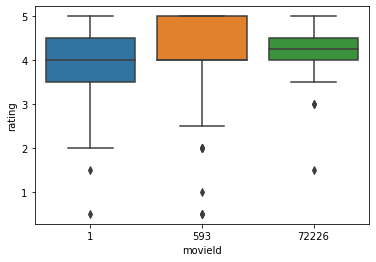

In [129]:
sns.boxplot( x = "movieId", y = "rating" ,data = notas.query("movieId in (1 , 593, 72226)"))

In [130]:
# Realizando o T test com Statemodels
descr_1 = DescrStatsW(notas1['rating'])
descr_593 = DescrStatsW(notas593['rating'])
comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [131]:
# Realizando o T test com Statemodels
descr_72226 = DescrStatsW(notas72226['rating'])
descr_593 = DescrStatsW(notas593['rating'])
comparacao = descr_72226.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [132]:
comparacao = descr_1.get_compare(descr_72226)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [133]:
notas.query("movieId in (1 , 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [134]:
comparacao = descr_72226.get_compare(descr_593)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [135]:
comparacao = descr_1.get_compare(descr_72226)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


## z teste e t teste assumem a normalidade da distribuição da amostra.

In [139]:
stat, p_value = normaltest(notas1['rating'])
print(f"Estatística:  {stat} P Valor: {p_value}\n")
print(f"Se o p_valor < que a nível de significância 0.05, então demonstra que a amostra não esta distribuida de forma normal e devemos usar teste não paramétrico é um teste de hipótese de que não requer que a distribuição da população.")

Estatística:  18.220369223286593 P Valor: 0.00011053430732728716

Se o p_valor < que a nível de significância 0.05, então demonstra que a amostra não esta distribuida de forma normal e devemos usar teste não paramétrico é um teste de hipótese de que não requer que a distribuição da população.


In [141]:
_ , p_value = ranksums(notas1['rating'], notas593['rating'])
print(f"P Valor: {p_value}\n")

P Valor: 0.0003267718756440693

